In [1]:
# <center>Outpatient and Ambulatory Surgery Consumer Assessment of Healthcare Providers and Systems</center>

### <center>A Data Science Blog Project</center>

#### <center>By: Rachel Bieron </center>

In [2]:
#setting up environment with imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
#get survey results
df=pd.read_csv("ASCQR_OAS_CAHPS_BY_ASC.csv")

In [4]:
#list the fields of the dataframe
print(list(df))

['Facility ID', 'Facility Name', 'Address', 'City/Town', 'State', 'ZIP Code', 'County/Parish', 'Telephone Number', 'Patients who reported that staff definitely gave care in a professional way and the facility was clean', 'Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean', 'Patients who reported that staff did not give care in a professional way or the facility was not clean', 'Facilities and staff linear mean score', 'Patients who reported that staff definitely communicated about what to expect during and after the procedure', 'Patients who reported that staff somewhat communicated about what to expect during and after the procedure', 'Patients who reported that staff did not communicate about what to expect during and after the procedure', 'Communication about your procedure linear mean score', 'Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)', 'Patients who gave the facility a ra

In [5]:
#describe the shape of the dataframe
df.shape

(710, 30)

In [6]:
#find out more about the fields including data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 30 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Facility ID                                                                                                   710 non-null    object 
 1   Facility Name                                                                                                 710 non-null    object 
 2   Address                                                                                                       710 non-null    object 
 3   City/Town                                                                                                     710 non-null    object 
 4   State                                                   

In [7]:
#Drop fields that we won't consider in our analysis
df = df.drop(['Footnote','Start Date','End Date','Facility ID','Facility Name','Address','City/Town','State','ZIP Code',
              'County/Parish','Telephone Number'], axis = 1)
df = df.drop(["Patients recommending the facility linear mean score", "Patients' rating of the facility linear mean score",
            "Facilities and staff linear mean score", "Communication about your procedure linear mean score","Number of Sampled Patients",
              "Number of Completed Surveys", "Survey Response Rate Percent" ], axis = 1)

In [8]:
#get an overview of the dataset
df.head()

,Patients who reported that staff definitely gave care in a professional way and the facility was clean,Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean,Patients who reported that staff did not give care in a professional way or the facility was not clean,Patients who reported that staff definitely communicated about what to expect during and after the procedure,Patients who reported that staff somewhat communicated about what to expect during and after the procedure,Patients who reported that staff did not communicate about what to expect during and after the procedure,Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest),Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest),Patients who reported YES they would DEFINITELY recommend the facility to family or friends,Patients who reported PROBABLY YES they would recommend the facility to family or friends,"Patients who reported NO, they would not recommend the facility to family or friends"
0,97.0,2.0,1.0,95.0,4.0,1.0,92.0,7.0,1.0,90.0,9.0,1.0
1,96.0,3.0,1.0,92.0,6.0,2.0,89.0,8.0,3.0,88.0,11.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96.0,4.0,0.0,91.0,8.0,1.0,89.0,10.0,1.0,82.0,17.0,1.0
4,97.0,3.0,0.0,92.0,6.0,2.0,88.0,10.0,2.0,87.0,12.0,1.0


In [9]:
#Check for null values
df.isna().sum()

Patients who reported that staff definitely gave care in a professional way and the facility was clean          211
Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean    211
Patients who reported that staff did not give care in a professional way or the facility was not clean          211
Patients who reported that staff definitely communicated about what to expect during and after the procedure    211
Patients who reported that staff somewhat communicated about what to expect during and after the procedure      211
Patients who reported that staff did not communicate about what to expect during and after the procedure        211
Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)                   211
Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)                    211
Patients who gave the facility a rating of 0 to 6 on a scale from 0 (low

In [10]:
#Replace null values with mean data
#get numeric columns
num_cols = df.select_dtypes(include=['float', 'int']).columns
#replace nulls
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [11]:
#verify nulls are gone
df.isna().sum()

Patients who reported that staff definitely gave care in a professional way and the facility was clean          0
Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean    0
Patients who reported that staff did not give care in a professional way or the facility was not clean          0
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0
Patients who reported that staff somewhat communicated about what to expect during and after the procedure      0
Patients who reported that staff did not communicate about what to expect during and after the procedure        0
Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)                   0
Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)                    0
Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (high

In [12]:
#Describe the data to look for standardization
df.describe()

,Patients who reported that staff definitely gave care in a professional way and the facility was clean,Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean,Patients who reported that staff did not give care in a professional way or the facility was not clean,Patients who reported that staff definitely communicated about what to expect during and after the procedure,Patients who reported that staff somewhat communicated about what to expect during and after the procedure,Patients who reported that staff did not communicate about what to expect during and after the procedure,Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest),Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest),Patients who reported YES they would DEFINITELY recommend the facility to family or friends,Patients who reported PROBABLY YES they would recommend the facility to family or friends,"Patients who reported NO, they would not recommend the facility to family or friends"
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,97.278557,2.450902,0.270541,91.911824,6.565130,1.523046,89.382766,8.763527,1.853707,86.983968,11.176353,1.839679
std,1.107915,0.885192,0.398298,1.918700,1.550574,0.617659,3.370806,2.701955,1.063778,4.003150,3.456863,1.055026
min,92.000000,0.000000,0.000000,84.000000,2.000000,0.000000,74.000000,1.000000,0.000000,61.000000,3.000000,0.000000
25%,97.000000,2.000000,0.000000,91.000000,6.000000,1.000000,89.000000,7.000000,1.000000,86.000000,9.000000,1.000000
50%,97.278557,2.450902,0.000000,91.911824,6.565130,1.523046,89.382766,8.763527,1.853707,86.983968,11.176353,1.839679
75%,98.000000,3.000000,0.270541,93.000000,7.000000,2.000000,91.000000,10.000000,2.000000,89.000000,12.000000,2.000000
max,100.000000,6.000000,3.000000,98.000000,12.000000,5.000000,99.000000,22.000000,9.000000,97.000000,33.000000,8.000000


In [13]:
#check the mean of the data
df.mean()

Patients who reported that staff definitely gave care in a professional way and the facility was clean          97.278557
Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean     2.450902
Patients who reported that staff did not give care in a professional way or the facility was not clean           0.270541
Patients who reported that staff definitely communicated about what to expect during and after the procedure    91.911824
Patients who reported that staff somewhat communicated about what to expect during and after the procedure       6.565130
Patients who reported that staff did not communicate about what to expect during and after the procedure         1.523046
Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)                   89.382766
Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)                     8.763527
Patients who gave the fa

In [14]:
#confirm data is not yeat standardized
df.std()

Patients who reported that staff definitely gave care in a professional way and the facility was clean          1.107915
Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean    0.885192
Patients who reported that staff did not give care in a professional way or the facility was not clean          0.398298
Patients who reported that staff definitely communicated about what to expect during and after the procedure    1.918700
Patients who reported that staff somewhat communicated about what to expect during and after the procedure      1.550574
Patients who reported that staff did not communicate about what to expect during and after the procedure        0.617659
Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)                   3.370806
Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)                    2.701955
Patients who gave the facility a

In [15]:
#Standardize data using scikit-learn StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

In [16]:
# Select features to standardize
features_to_standardize = df.columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

In [17]:
#Describe standarized data
df.describe()

,Patients who reported that staff definitely gave care in a professional way and the facility was clean,Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean,Patients who reported that staff did not give care in a professional way or the facility was not clean,Patients who reported that staff definitely communicated about what to expect during and after the procedure,Patients who reported that staff somewhat communicated about what to expect during and after the procedure,Patients who reported that staff did not communicate about what to expect during and after the procedure,Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest),Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest),Patients who reported YES they would DEFINITELY recommend the facility to family or friends,Patients who reported PROBABLY YES they would recommend the facility to family or friends,"Patients who reported NO, they would not recommend the facility to family or friends"
count,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02
mean,-3.497672e-15,-7.505733e-17,4.003058e-17,2.461880e-15,7.005351e-17,-3.002293e-16,5.163944e-15,6.655083e-16,1.000764e-17,-4.803669e-16,-3.902981e-16,1.401070e-16
std,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00
min,-4.767764e+00,-2.770733e+00,-6.797209e-01,-4.126440e+00,-2.946232e+00,-2.467577e+00,-4.566745e+00,-2.875326e+00,-1.743799e+00,-6.495457e+00,-2.366920e+00,-1.744957e+00
25%,-2.516018e-01,-5.097423e-01,-6.797209e-01,-4.755649e-01,-3.647222e-01,-8.474178e-01,-1.136332e-01,-6.531458e-01,-8.030900e-01,-2.459717e-01,-6.300183e-01,-7.964457e-01
50%,0.000000e+00,0.000000e+00,-6.797209e-01,0.000000e+00,0.000000e+00,-3.597475e-16,4.218835e-15,6.578975e-16,0.000000e+00,0.000000e+00,-5.142261e-16,2.106119e-16
75%,6.516306e-01,6.207529e-01,0.000000e+00,5.675423e-01,2.806551e-01,7.727411e-01,4.801151e-01,4.579443e-01,1.376187e-01,5.039665e-01,2.384323e-01,1.520660e-01
max,2.458096e+00,4.012239e+00,6.857629e+00,3.175310e+00,3.507542e+00,5.633218e+00,2.855108e+00,4.902304e+00,6.722580e+00,2.503802e+00,6.317587e+00,5.843136e+00


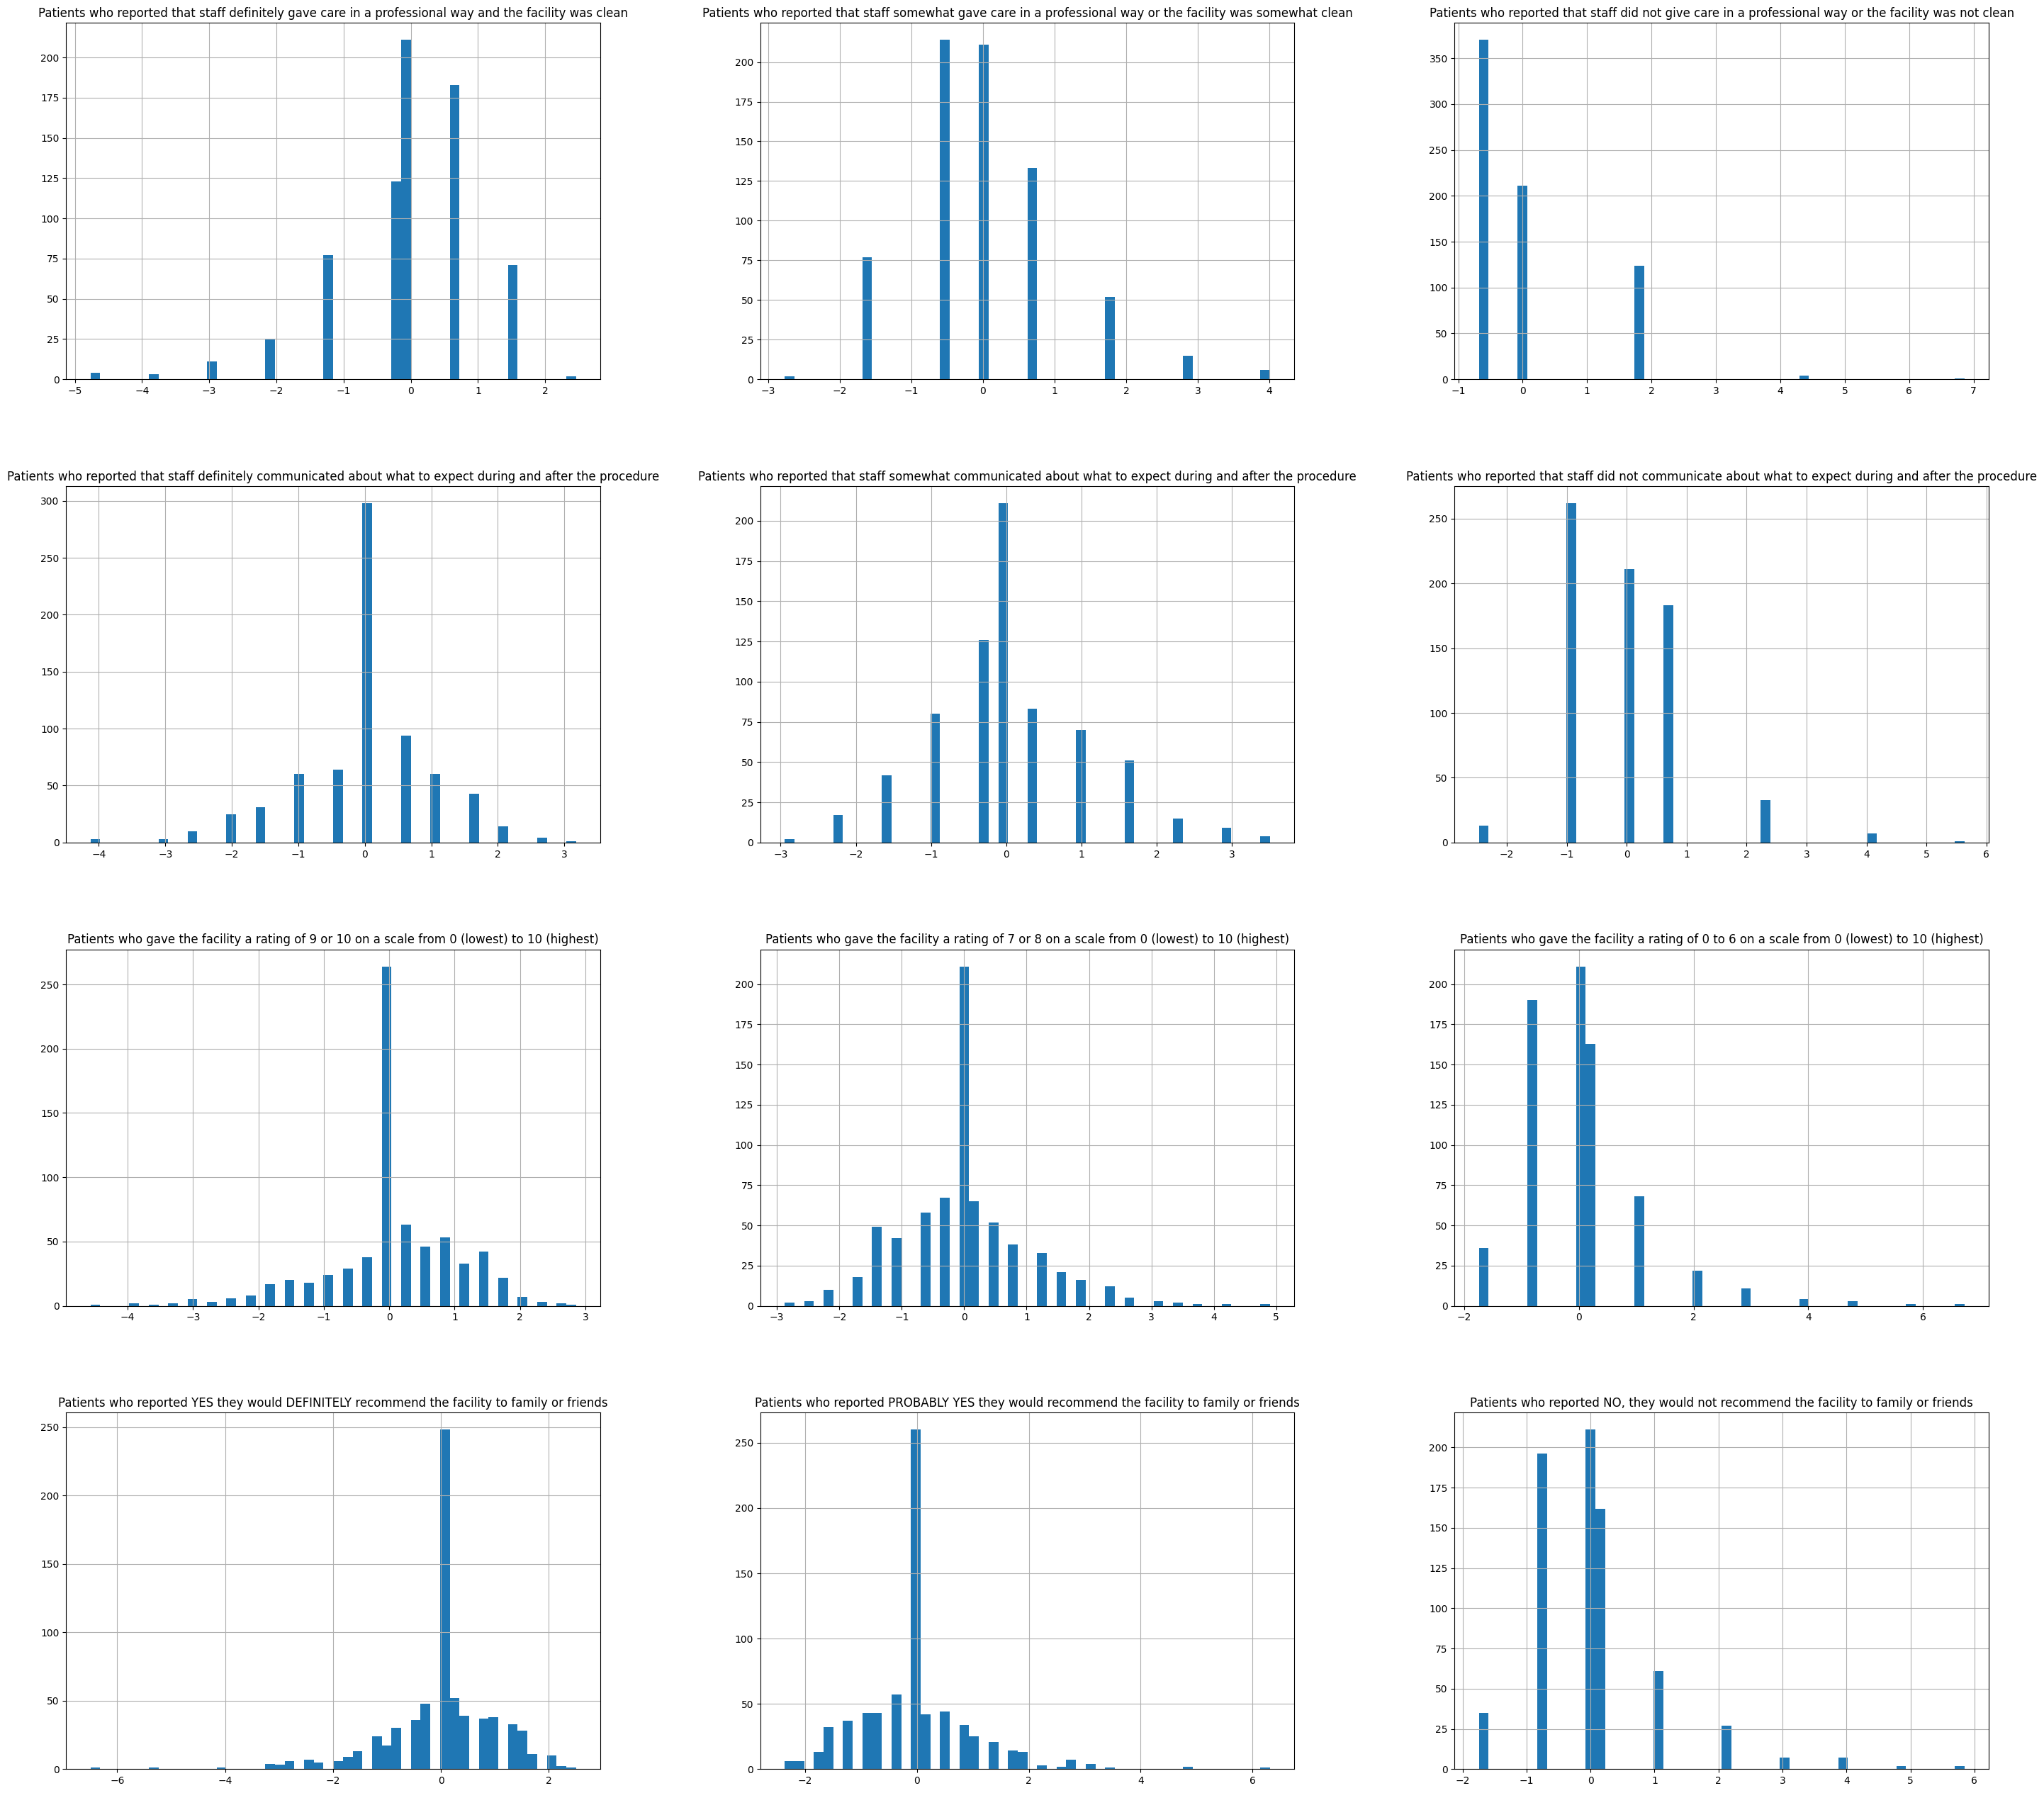

In [18]:
# plot histograms of the features with matplotlib to see their distributions
df.hist(bins=50, figsize=(35, 32))
plt.show()